# Attempt at modeling and encoding

This section is quite messy, but the things that I attempted are as follows:

As ML Models can only process numeric data, all player names and character pairs have to be passed on as numbers
So the following steps were taken
1. Players are encoded as their respective skill points.
2. character pairs are encoded with one-hot or popularity.

This initial attempt did not show good accuracy due to my mistake that I first used the MMR of the winner as the target variable. Accuracy greatly improved when I used 1 or 2 (player 1 / player 2) as the target variable.

In [1]:
import pandas as pd


In [2]:
games = pd.read_csv("rpglite_wrangled.csv")

In [3]:
players = pd.read_csv("players.csv")

In [4]:
games.head(10)

,player1,player2,strat_1,strat_2,balance_code,playerwin
0,Ellen,BestWilliam,AK,KR,NaN,Ellen
1,probablytom,cptKav,AR,AK,NaN,cptKav
2,Sabotage,Ellen,KR,AK,NaN,Ellen
3,Luca1802,Ellen,AH,AR,NaN,Ellen
4,Ellen,cptKav,AK,KR,NaN,cptKav
5,Frp97,Luca1802,AK,HK,NaN,Luca1802
6,Sabotage,Ellen,AR,HK,NaN,Ellen
7,Ellen,Sabotage,RW,AK,NaN,Ellen
8,Frp97,Ellen,HR,RW,NaN,Ellen
9,Sabotage,cptKav,AK,HK,NaN,cptKav


# Encoding with character pair pick number as the popularity score and normalizing

In [5]:
#picks done by popularity
picks = pd.read_csv("picks.csv")
#picks.head(30)

In [6]:
picks = picks.dropna()
print(picks)

   strat_1   picks
0       AB   351.0
1       AG   233.0
2       AH   368.0
3       AK   602.0
4       AM   122.0
5       AR  1388.0
6       AW   278.0
7       BG  1690.0
8       BH   253.0
9       BK   575.0
10      BM   372.0
11      BR   283.0
12      BW   288.0
13      GH   267.0
14      GK   448.0
15      GM   478.0
16      GR  1326.0
17      GW  1722.0
18      HK   363.0
19      HM    98.0
20      HR   259.0
21      HW   104.0
22      KM   143.0
23      KR   364.0
24      KW   208.0
25      MR  1366.0
26      MW   347.0
27      RW   596.0


In [7]:
#normalize picks
#picks.dtypes
picks['norms'] = picks['picks'].apply(lambda x: (x - 98) / (1722 - 98)) 
#normalized_picks=(picks-picks.min())/(picks.max()-picks.min())
#print(normalized_picks)

In [8]:
#rank picks
picks['rank'] = picks['picks'].rank(ascending=False)

In [9]:
map_picks = dict(picks[['strat_1','norms']].values)
print(map_picks)

{'AB': 0.15578817733990147, 'AG': 0.08312807881773399, 'AH': 0.16625615763546797, 'AK': 0.3103448275862069, 'AM': 0.014778325123152709, 'AR': 0.7943349753694581, 'AW': 0.11083743842364532, 'BG': 0.9802955665024631, 'BH': 0.09544334975369458, 'BK': 0.2937192118226601, 'BM': 0.1687192118226601, 'BR': 0.11391625615763547, 'BW': 0.11699507389162561, 'GH': 0.10406403940886699, 'GK': 0.21551724137931033, 'GM': 0.23399014778325122, 'GR': 0.7561576354679803, 'GW': 1.0, 'HK': 0.16317733990147784, 'HM': 0.0, 'HR': 0.09913793103448276, 'HW': 0.003694581280788177, 'KM': 0.02770935960591133, 'KR': 0.16379310344827586, 'KW': 0.06773399014778325, 'MR': 0.7807881773399015, 'MW': 0.15332512315270935, 'RW': 0.3066502463054187}


In [10]:
rank_picks = dict(picks[['strat_1','rank']].values)
print(rank_picks)

{'AB': 15.0, 'AG': 23.0, 'AH': 12.0, 'AK': 6.0, 'AM': 26.0, 'AR': 3.0, 'AW': 19.0, 'BG': 2.0, 'BH': 22.0, 'BK': 8.0, 'BM': 11.0, 'BR': 18.0, 'BW': 17.0, 'GH': 20.0, 'GK': 10.0, 'GM': 9.0, 'GR': 5.0, 'GW': 1.0, 'HK': 14.0, 'HM': 28.0, 'HR': 21.0, 'HW': 27.0, 'KM': 25.0, 'KR': 13.0, 'KW': 24.0, 'MR': 4.0, 'MW': 16.0, 'RW': 7.0}


In [11]:
mapping = dict(players[['Username','skill_points']].values)
print(mapping)

{'probablytom': 5820, 'cptKav': 8606, 'Royce': 0, 'BestWilliam': 1131, 'Ellen': 10151, 'alanismcq': 0, 'Frp97': 15558, 'Avodado14': 0, 'Smellinda': 0, 'Sabotage': 1172, 'Jash98': 0, 'eggface': 2625, 'georgedo': 5885, 'James': 0, 'KingCheese': 60, 'Luca1802': 11810, 'Beth': 3403, 'Mati': 0, 'alan': 3927, 'CPTH': 10, 'BenL98': 0, 'Mageofheart': 450, 'demander': 735, 'Marta': 1014, 'Gerr': 937, 'Jules_217': 280, 'ruadh_mor': 456, 'CalHaribo': 1092, 'Porp': 20, 'david': 0, 'temma': 10, 'ScAer0n': 10, 'azure': 0, 'Etess': 2345, 'BabaG': 15, 'cats': 533, 'grobis': 83, 'cute320215': 472, 'Tom_': 0, 'Marilu': 20, 'Super_Ia': 103, 'Connman96': 54, 'DoctorW': 2047, 'MG13': 20, 'TrueGrit': 0, 'michel': 0, 'melon': 0, 'creilly2': 3216, 'sidb': 705, 'Robulous1': 0, 'narhguoliac': 0, 'Turner': 0, 'LewisDyer': 400, 'QueenAnne': 0, 'GReat': 174, 'Arthurs': 0, 'Dark_Knight': 10, 'apropos0': 16524, 'pool27': 1867, 'charlotte': 1546, 's_c_bear': 0, 'Williscraft': 154, 'sody': 0, 'gethin': 40, 'Paulverise

In [12]:
games['mmr_p1']=games.player1.map(mapping)
games['mmr_p2']=games.player2.map(mapping)
games['mmr_winner']=games.playerwin.map(mapping)

In [13]:
games.fillna(1)

,player1,player2,strat_1,strat_2,balance_code,playerwin,mmr_p1,mmr_p2,mmr_winner
0,Ellen,BestWilliam,AK,KR,1.0,Ellen,10151,1131,10151
1,probablytom,cptKav,AR,AK,1.0,cptKav,5820,8606,8606
2,Sabotage,Ellen,KR,AK,1.0,Ellen,1172,10151,10151
3,Luca1802,Ellen,AH,AR,1.0,Ellen,11810,10151,10151
4,Ellen,cptKav,AK,KR,1.0,cptKav,10151,8606,8606
...,...,...,...,...,...,...,...,...,...
7441,l17r,apropos0,AR,GW,1.2,apropos0,15234,16524,16524
7442,l17r,apropos0,AR,GW,1.2,apropos0,15234,16524,16524
7443,l17r,Frp97,AR,BG,1.2,l17r,15234,15558,15234
7444,l17r,Frp97,AR,BG,1.2,Frp97,15234,15558,15558


In [14]:
games.head(5)

,player1,player2,strat_1,strat_2,balance_code,playerwin,mmr_p1,mmr_p2,mmr_winner
0,Ellen,BestWilliam,AK,KR,NaN,Ellen,10151,1131,10151
1,probablytom,cptKav,AR,AK,NaN,cptKav,5820,8606,8606
2,Sabotage,Ellen,KR,AK,NaN,Ellen,1172,10151,10151
3,Luca1802,Ellen,AH,AR,NaN,Ellen,11810,10151,10151
4,Ellen,cptKav,AK,KR,NaN,cptKav,10151,8606,8606


In [15]:
games['pr_1']=games.strat_1.map(rank_picks)
games['pr_2']=games.strat_2.map(rank_picks)

In [16]:
#map_picks 
games['strat_1']=games.strat_1.map(map_picks)
games['strat_2']=games.strat_2.map(map_picks)
games=games.fillna(1)

In [17]:
games.head(5)

,player1,player2,strat_1,strat_2,balance_code,playerwin,mmr_p1,mmr_p2,mmr_winner,pr_1,pr_2
0,Ellen,BestWilliam,0.310345,0.163793,1.0,Ellen,10151,1131,10151,6.0,13.0
1,probablytom,cptKav,0.794335,0.310345,1.0,cptKav,5820,8606,8606,3.0,6.0
2,Sabotage,Ellen,0.163793,0.310345,1.0,Ellen,1172,10151,10151,13.0,6.0
3,Luca1802,Ellen,0.166256,0.794335,1.0,Ellen,11810,10151,10151,12.0,3.0
4,Ellen,cptKav,0.310345,0.163793,1.0,cptKav,10151,8606,8606,6.0,13.0


In [18]:
games.to_csv("prediction_popularity")

In [19]:
import sklearn
from sklearn.model_selection import train_test_split

In [20]:
#Preprocess #1
#Kavanaugh Player is encoded as as SKill points.


In [21]:
#with normalized picks
X = games.drop(['player1','player2','playerwin','mmr_winner','pr_1','pr_2'],axis=1)
X.head(5)

,strat_1,strat_2,balance_code,mmr_p1,mmr_p2
0,0.310345,0.163793,1.0,10151,1131
1,0.794335,0.310345,1.0,5820,8606
2,0.163793,0.310345,1.0,1172,10151
3,0.166256,0.794335,1.0,11810,10151
4,0.310345,0.163793,1.0,10151,8606


In [22]:
#sample for player1v2
X_train, X_test, y_train, y_test = train_test_split(X, games['mmr_winner'], test_size=0.3, 
                                stratify = X['balance_code'])

In [23]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [24]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4785138764547896


In [25]:
clf.feature_importances_
#version, player1 MMR, player2 MMR, p1 strat, p2strat
#normalized MMR

array([0.18334666, 0.18794444, 0.01729784, 0.3025027 , 0.30890836])

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  62,  17,  12],
       [  0,   0,   0, ...,   1, 106,   0],
       [  0,   0,   0, ...,   6,   5, 112]], dtype=int64)

In [27]:
#with picks as ranks
X = games.drop(['player1','player2','playerwin','mmr_winner','strat_1','strat_2'],axis=1)
X.head(5)

,balance_code,mmr_p1,mmr_p2,pr_1,pr_2
0,1.0,10151,1131,6.0,13.0
1,1.0,5820,8606,3.0,6.0
2,1.0,1172,10151,13.0,6.0
3,1.0,11810,10151,12.0,3.0
4,1.0,10151,8606,6.0,13.0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, games['mmr_winner'], test_size=0.3, 
                                stratify = X['balance_code'])

In [29]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.45344673231871085


In [30]:
clf.feature_importances_

array([0.01785719, 0.30304252, 0.30842966, 0.18343114, 0.18723949])

Character tactics replaced as one-hot encoding

In [31]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.41405550581915845


In [32]:
games = pd.read_csv("rpglite_wrangled.csv")

In [33]:
games.head(5)

,player1,player2,strat_1,strat_2,balance_code,playerwin
0,Ellen,BestWilliam,AK,KR,NaN,Ellen
1,probablytom,cptKav,AR,AK,NaN,cptKav
2,Sabotage,Ellen,KR,AK,NaN,Ellen
3,Luca1802,Ellen,AH,AR,NaN,Ellen
4,Ellen,cptKav,AK,KR,NaN,cptKav


In [34]:
categorical_cols = ['strat_1','strat_2'] 
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
games[categorical_cols] = games[categorical_cols].apply(lambda col: le.fit_transform(col))    
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

#One-hot-encode the categorical columns.
#Unfortunately outputs an array instead of dataframe.
array_hot_encoded = ohe.fit_transform(games[categorical_cols])

#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=games.index)

#Extract only the columns that didnt need to be encoded
data_other_cols = games.drop(columns=categorical_cols)

In [35]:
games.head(5)

,player1,player2,strat_1,strat_2,balance_code,playerwin
0,Ellen,BestWilliam,3,23,NaN,Ellen
1,probablytom,cptKav,5,3,NaN,cptKav
2,Sabotage,Ellen,23,3,NaN,Ellen
3,Luca1802,Ellen,2,5,NaN,Ellen
4,Ellen,cptKav,3,23,NaN,cptKav


In [36]:
games['mmr_p1']=games.player1.map(mapping)
games['mmr_p2']=games.player2.map(mapping)
games['mmr_winner']=games.playerwin.map(mapping)

games.head(5)

,player1,player2,strat_1,strat_2,balance_code,playerwin,mmr_p1,mmr_p2,mmr_winner
0,Ellen,BestWilliam,3,23,NaN,Ellen,10151,1131,10151
1,probablytom,cptKav,5,3,NaN,cptKav,5820,8606,8606
2,Sabotage,Ellen,23,3,NaN,Ellen,1172,10151,10151
3,Luca1802,Ellen,2,5,NaN,Ellen,11810,10151,10151
4,Ellen,cptKav,3,23,NaN,cptKav,10151,8606,8606


In [37]:
games = games.fillna(1)

In [38]:
games.to_csv("prediction_onehot.csv")

In [39]:
X = games.drop(['player1','player2','playerwin','mmr_winner'],axis=1)
X.head(5)

,strat_1,strat_2,balance_code,mmr_p1,mmr_p2
0,3,23,1.0,10151,1131
1,5,3,1.0,5820,8606
2,23,3,1.0,1172,10151
3,2,5,1.0,11810,10151
4,3,23,1.0,10151,8606


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, games['mmr_winner'], test_size=0.3, 
                                stratify = X['balance_code'])

In [41]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4650850492390331


In [42]:
clf.feature_importances_

array([0.18569514, 0.19049332, 0.01705114, 0.29704815, 0.30971226])

# Chapter 4 Section 5, Attempt at linear regression for finding patch timing

In [43]:
#linear regression
picks_afterpatch = pd.read_csv('afterpatch.csv')

In [44]:
picks_afterpatch = picks_afterpatch[:-1]

In [45]:
picks_afterpatch_corr = picks_afterpatch.drop(['week'],axis=1)

In [46]:
print(picks_afterpatch)

    week  ArcherBarbarian  ArcherGunner  ArcherHealer  ArcherKnight  \
0     17             19.0           8.0           4.0          23.0   
1     18              8.0           3.0           9.0          30.0   
2     19             70.0           7.0          75.0         165.0   
3     20             39.0          33.0          21.0          58.0   
4     21             12.0          32.0          17.0          39.0   
5     22             19.0           4.0          10.0           2.0   
6     23              6.0           5.0           5.0           5.0   
7     24              6.0           3.0           6.0           4.0   
8     25              2.0           6.0           8.0           1.0   
9     26              4.0           2.0           3.0           9.0   
10    27             11.0           3.0           4.0           1.0   
11    28              1.0           1.0           4.0           8.0   
12    29              0.0          10.0           0.0           1.0   
13    

In [47]:
trps = picks_afterpatch_corr.corr()

In [48]:
print(type(trps))

<class 'pandas.core.frame.DataFrame'>


In [49]:
trps.style.background_gradient(cmap='coolwarm')

,ArcherBarbarian,ArcherGunner,ArcherHealer,ArcherKnight,ArcherMonk,ArcherRogue,ArcherWizard,BarbarianGunner,BarbarianHealer,BarbarianKnight,BarbarianMonk,BarbarianRogue,BarbarianWizard,GunnerHealer,GunnerKnight,GunnerMonk,GunnerRogue,GunnerWizard,HealerKnight,HealerMonk,HealerRogue,HealerWizard,KnightMonk,KnightRogue,KnightWizard,MonkRogue,MonkWizard,RogueWizard,Total
ArcherBarbarian,1.000000,0.381432,0.927878,0.934570,0.462375,0.920860,0.829387,0.859329,0.951891,0.246728,0.756253,0.900071,0.948106,0.858480,0.743225,0.810207,0.830268,0.812800,0.899038,0.917498,0.774739,0.792752,0.794212,0.832260,0.909807,0.849580,0.867653,0.788791,0.948775
ArcherGunner,0.381432,1.000000,0.277617,0.341594,0.256652,0.413009,0.427104,0.274257,0.373670,-0.162928,0.541561,0.286658,0.521708,0.193708,0.235242,0.136007,0.573821,0.433631,0.122141,0.155558,0.019294,0.089036,0.303368,0.152227,0.376304,0.373547,0.085182,0.125766,0.379378
ArcherHealer,0.927878,0.277617,1.000000,0.974645,0.435971,0.964871,0.714347,0.879343,0.885361,0.350739,0.519430,0.825295,0.902950,0.831964,0.725054,0.859241,0.763045,0.770225,0.916530,0.936213,0.879619,0.897627,0.674145,0.929969,0.943457,0.883389,0.934876,0.843644,0.951617
ArcherKnight,0.934570,0.341594,0.974645,1.000000,0.507035,0.963093,0.791967,0.870168,0.922695,0.283005,0.619160,0.864540,0.913880,0.842285,0.804770,0.816926,0.752889,0.735938,0.945542,0.925769,0.868889,0.878770,0.696470,0.942906,0.950140,0.928413,0.931663,0.785663,0.959735
ArcherMonk,0.462375,0.256652,0.435971,0.507035,1.000000,0.535318,0.525825,0.454296,0.590789,0.185979,0.438282,0.492266,0.488214,0.524965,0.502342,0.471117,0.327939,0.500337,0.486401,0.476813,0.613876,0.534842,0.221182,0.486664,0.643330,0.455911,0.542725,0.458340,0.532568
ArcherRogue,0.920860,0.413009,0.964871,0.963093,0.535318,1.000000,0.761964,0.887086,0.898144,0.244137,0.565865,0.780514,0.933568,0.853688,0.765953,0.798831,0.828057,0.826211,0.877696,0.885843,0.839913,0.863334,0.655531,0.918794,0.937540,0.877190,0.871124,0.813899,0.962500
ArcherWizard,0.829387,0.427104,0.714347,0.791967,0.525825,0.761964,1.000000,0.752635,0.868696,0.262550,0.874007,0.833094,0.880099,0.879844,0.853653,0.661722,0.771828,0.720801,0.823871,0.756084,0.640555,0.712574,0.781723,0.756762,0.732928,0.853895,0.682774,0.615773,0.856166
BarbarianGunner,0.859329,0.274257,0.879343,0.870168,0.454296,0.887086,0.752635,1.000000,0.832658,0.360121,0.570347,0.755996,0.846238,0.894639,0.803504,0.844994,0.877028,0.887954,0.852523,0.831439,0.834861,0.850014,0.769069,0.893730,0.849695,0.874069,0.792823,0.912906,0.951895
BarbarianHealer,0.951891,0.373670,0.885361,0.922695,0.590789,0.898144,0.868696,0.832658,1.000000,0.310980,0.775913,0.888648,0.944426,0.854664,0.805538,0.816778,0.766507,0.806908,0.896432,0.919382,0.778461,0.850096,0.684732,0.838545,0.889677,0.840306,0.854797,0.763237,0.935968
BarbarianKnight,0.246728,-0.162928,0.350739,0.283005,0.185979,0.244137,0.262550,0.360121,0.310980,1.000000,0.035520,0.356508,0.273833,0.354479,0.159849,0.694310,0.165328,0.345610,0.311619,0.464497,0.417248,0.554841,0.041712,0.355360,0.313375,0.253811,0.371145,0.494787,0.342376


In [50]:
trps['BarbarianGunner']

ArcherBarbarian    0.859329
ArcherGunner       0.274257
ArcherHealer       0.879343
ArcherKnight       0.870168
ArcherMonk         0.454296
ArcherRogue        0.887086
ArcherWizard       0.752635
BarbarianGunner    1.000000
BarbarianHealer    0.832658
BarbarianKnight    0.360121
BarbarianMonk      0.570347
BarbarianRogue     0.755996
BarbarianWizard    0.846238
GunnerHealer       0.894639
GunnerKnight       0.803504
GunnerMonk         0.844994
GunnerRogue        0.877028
GunnerWizard       0.887954
HealerKnight       0.852523
HealerMonk         0.831439
HealerRogue        0.834861
HealerWizard       0.850014
KnightMonk         0.769069
KnightRogue        0.893730
KnightWizard       0.849695
MonkRogue          0.874069
MonkWizard         0.792823
RogueWizard        0.912906
Total              0.951895
Name: BarbarianGunner, dtype: float64

In [51]:
stagnating_patch = picks_afterpatch.head(8)

In [52]:
print(stagnating_patch)

   week  ArcherBarbarian  ArcherGunner  ArcherHealer  ArcherKnight  \
0    17             19.0           8.0           4.0          23.0   
1    18              8.0           3.0           9.0          30.0   
2    19             70.0           7.0          75.0         165.0   
3    20             39.0          33.0          21.0          58.0   
4    21             12.0          32.0          17.0          39.0   
5    22             19.0           4.0          10.0           2.0   
6    23              6.0           5.0           5.0           5.0   
7    24              6.0           3.0           6.0           4.0   

   ArcherMonk  ArcherRogue  ArcherWizard  BarbarianGunner  BarbarianHealer  \
0         4.0          8.0          23.0             37.0              8.0   
1         4.0         42.0          28.0             74.0              6.0   
2         8.0        147.0          38.0            144.0             27.0   
3         7.0         75.0          32.0             73.0

In [53]:
others = stagnating_patch.drop(['BarbarianGunner'], axis=1)
BG =  stagnating_patch['BarbarianGunner']

In [54]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(others, BG)

LinearRegression()

In [55]:
import statsmodels.api as sm
others = sm.add_constant(others) # adding a constant
model = sm.OLS(BG, others).fit()
predictions = model.predict(others) 

In [56]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:        BarbarianGunner   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 22 Aug 2022   Prob (F-statistic):                nan
Time:                        03:14:58   Log-Likelihood:                 240.71
No. Observations:                   8   AIC:                            -465.4
Df Residuals:                       0   BIC:                            -464.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0179        inf     

C:\Users\jwyan\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\jwyan\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\jwyan\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\jwyan\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [57]:
time = stagnating_patch['week']
BG =  stagnating_patch['BarbarianGunner']

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)

<AxesSubplot:xlabel='week', ylabel='ArcherRogue'>

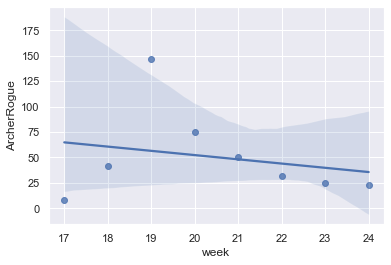

In [59]:
sns.regplot(x="week",y="ArcherRogue",data = stagnating_patch)

<AxesSubplot:xlabel='week', ylabel='GunnerKnight'>

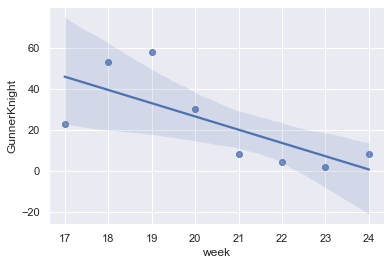

In [60]:
sns.regplot(x="week",y="GunnerKnight",data = stagnating_patch)

<AxesSubplot:xlabel='week', ylabel='BarbarianWizard'>

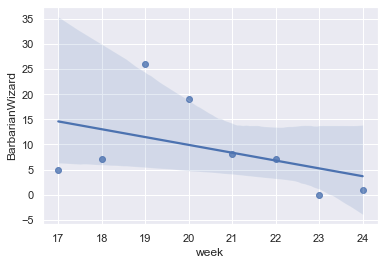

In [61]:
sns.regplot(x="week",y="BarbarianWizard",data = stagnating_patch)

# Attempt to use win rate as the players' character pair metric

This was a later addon which would be better explained by ML_newmetrics.ipynb
This was first time I tried to replace the character pair metric of something more reflective of the player, which is the win rate of the character pair by a certain player.


In [62]:
#picks done by popularity
winrates = pd.read_csv("E:/rpglite-data/winrates.csv")
#picks.head(30)

In [63]:
winrates.head(39)

,player,strat,wins,total_matches,winrate
0,7Name1eSs,AH,2,2,1.000000
1,AMrza99,AB,0,1,0.000000
2,AMrza99,AH,1,2,0.500000
3,AMrza99,AK,0,1,0.000000
4,AMrza99,BR,1,3,0.333333
5,AMrza99,HK,1,1,1.000000
6,AMrza99,HW,0,1,0.000000
7,AMrza99,KR,1,2,0.500000
8,AMrza99,RW,1,1,1.000000
9,AethelredVS,AH,0,1,0.000000


In [64]:
games = pd.read_csv("rpglite_wrangled.csv")
games.head(10)

,player1,player2,strat_1,strat_2,balance_code,playerwin
0,Ellen,BestWilliam,AK,KR,NaN,Ellen
1,probablytom,cptKav,AR,AK,NaN,cptKav
2,Sabotage,Ellen,KR,AK,NaN,Ellen
3,Luca1802,Ellen,AH,AR,NaN,Ellen
4,Ellen,cptKav,AK,KR,NaN,cptKav
5,Frp97,Luca1802,AK,HK,NaN,Luca1802
6,Sabotage,Ellen,AR,HK,NaN,Ellen
7,Ellen,Sabotage,RW,AK,NaN,Ellen
8,Frp97,Ellen,HR,RW,NaN,Ellen
9,Sabotage,cptKav,AK,HK,NaN,cptKav


In [65]:
games['mmr_p1']=games.player1.map(mapping)
games['mmr_p2']=games.player2.map(mapping)
games['mmr_winner']=games.playerwin.map(mapping)

In [66]:
games.head(10)

,player1,player2,strat_1,strat_2,balance_code,playerwin,mmr_p1,mmr_p2,mmr_winner
0,Ellen,BestWilliam,AK,KR,NaN,Ellen,10151,1131,10151
1,probablytom,cptKav,AR,AK,NaN,cptKav,5820,8606,8606
2,Sabotage,Ellen,KR,AK,NaN,Ellen,1172,10151,10151
3,Luca1802,Ellen,AH,AR,NaN,Ellen,11810,10151,10151
4,Ellen,cptKav,AK,KR,NaN,cptKav,10151,8606,8606
5,Frp97,Luca1802,AK,HK,NaN,Luca1802,15558,11810,11810
6,Sabotage,Ellen,AR,HK,NaN,Ellen,1172,10151,10151
7,Ellen,Sabotage,RW,AK,NaN,Ellen,10151,1172,10151
8,Frp97,Ellen,HR,RW,NaN,Ellen,15558,10151,10151
9,Sabotage,cptKav,AK,HK,NaN,cptKav,1172,8606,8606


In [67]:
#RENAME SPECIFIC COLUMNS
#Use the df.rename() function and refer the columns to be renamed. Not all the columns have to be renamed:

winrate_p1 = winrates.rename(columns={'player': 'player1', 'strat': 'strat1','winrate': 'winrate1'})
winrate_p1 = winrate_p1.drop(['wins','total_matches'], axis=1)
winrate_p1.head(5)

,player1,strat1,winrate1
0,7Name1eSs,AH,1.000000
1,AMrza99,AB,0.000000
2,AMrza99,AH,0.500000
3,AMrza99,AK,0.000000
4,AMrza99,BR,0.333333


In [68]:
winrate_p2 = winrates.rename(columns={'player': 'player2', 'strat': 'strat2','winrate': 'winrate2'})
winrate_p2 = winrate_p2.drop(['wins','total_matches'],axis=1)
winrate_p2.head(5)

,player2,strat2,winrate2
0,7Name1eSs,AH,1.000000
1,AMrza99,AB,0.000000
2,AMrza99,AH,0.500000
3,AMrza99,AK,0.000000
4,AMrza99,BR,0.333333


In [69]:
p1_merged = pd.merge(games, winrate_p1, left_on=['player1', 'strat_1'],right_on=['player1', 'strat1'], how='left')
p1_merged.head(20)

,player1,player2,strat_1,strat_2,balance_code,playerwin,mmr_p1,mmr_p2,mmr_winner,strat1,winrate1
0,Ellen,BestWilliam,AK,KR,NaN,Ellen,10151,1131,10151,AK,0.600000
1,probablytom,cptKav,AR,AK,NaN,cptKav,5820,8606,8606,AR,0.440000
2,Sabotage,Ellen,KR,AK,NaN,Ellen,1172,10151,10151,KR,0.000000
3,Luca1802,Ellen,AH,AR,NaN,Ellen,11810,10151,10151,AH,0.000000
4,Ellen,cptKav,AK,KR,NaN,cptKav,10151,8606,8606,AK,0.600000
5,Frp97,Luca1802,AK,HK,NaN,Luca1802,15558,11810,11810,AK,0.000000
6,Sabotage,Ellen,AR,HK,NaN,Ellen,1172,10151,10151,AR,0.000000
7,Ellen,Sabotage,RW,AK,NaN,Ellen,10151,1172,10151,RW,0.586957
8,Frp97,Ellen,HR,RW,NaN,Ellen,15558,10151,10151,HR,0.000000
9,Sabotage,cptKav,AK,HK,NaN,cptKav,1172,8606,8606,AK,0.000000


In [70]:
p2_merged = pd.merge(p1_merged, winrate_p2, left_on=['player2', 'strat_2'],right_on=['player2', 'strat2'], how='left')
p2_merged.head(20)

,player1,player2,strat_1,strat_2,balance_code,playerwin,mmr_p1,mmr_p2,mmr_winner,strat1,winrate1,strat2,winrate2
0,Ellen,BestWilliam,AK,KR,NaN,Ellen,10151,1131,10151,AK,0.600000,KR,0.608696
1,probablytom,cptKav,AR,AK,NaN,cptKav,5820,8606,8606,AR,0.440000,AK,0.666667
2,Sabotage,Ellen,KR,AK,NaN,Ellen,1172,10151,10151,KR,0.000000,AK,0.600000
3,Luca1802,Ellen,AH,AR,NaN,Ellen,11810,10151,10151,AH,0.000000,AR,0.571429
4,Ellen,cptKav,AK,KR,NaN,cptKav,10151,8606,8606,AK,0.600000,KR,0.285714
5,Frp97,Luca1802,AK,HK,NaN,Luca1802,15558,11810,11810,AK,0.000000,HK,0.500000
6,Sabotage,Ellen,AR,HK,NaN,Ellen,1172,10151,10151,AR,0.000000,HK,0.411765
7,Ellen,Sabotage,RW,AK,NaN,Ellen,10151,1172,10151,RW,0.586957,AK,0.000000
8,Frp97,Ellen,HR,RW,NaN,Ellen,15558,10151,10151,HR,0.000000,RW,0.586957
9,Sabotage,cptKav,AK,HK,NaN,cptKav,1172,8606,8606,AK,0.000000,HK,0.608696


In [71]:
df_winrate = p2_merged.drop(['player1','player2','strat_1','strat_2','strat1','strat2','playerwin'],axis=1)
df_winrate.head(5)

,balance_code,mmr_p1,mmr_p2,mmr_winner,winrate1,winrate2
0,NaN,10151,1131,10151,0.60,0.608696
1,NaN,5820,8606,8606,0.44,0.666667
2,NaN,1172,10151,10151,0.00,0.600000
3,NaN,11810,10151,10151,0.00,0.571429
4,NaN,10151,8606,8606,0.60,0.285714


In [72]:
df_winrate=df_winrate.fillna(1)

In [73]:
df_winrate.to_csv("games_newmmr.csv")

In [74]:
df_winrate=df_winrate.fillna(1)
X = df_winrate.drop(['mmr_winner'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, df_winrate['mmr_winner'], test_size=0.3, 
                                stratify = X['balance_code'])

In [75]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
clf.feature_importances_

Accuracy: 0.5085049239033125


array([0.01624902, 0.28058965, 0.27735221, 0.21056505, 0.21524407])

In [76]:
df_winrate.head(5)

,balance_code,mmr_p1,mmr_p2,mmr_winner,winrate1,winrate2
0,1.0,10151,1131,10151,0.60,0.608696
1,1.0,5820,8606,8606,0.44,0.666667
2,1.0,1172,10151,10151,0.00,0.600000
3,1.0,11810,10151,10151,0.00,0.571429
4,1.0,10151,8606,8606,0.60,0.285714


In [77]:
clf.feature_importances_

array([0.01624902, 0.28058965, 0.27735221, 0.21056505, 0.21524407])

In [78]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.44001790510295435


In [79]:
players.head(5)

,Unnamed: 0,Username,Played,Won,tag_bg,Games,count_character_has_won,count_character_has_been_played,accepting_games,skill_points,last_logged_in,badge_progressions,elo,lost_against,current_season_skill
0,0,probablytom,263,137,nature,"['none', 'none', 'none', 'none', 'none']","{'K': 16, 'A': 33, 'R': 47, 'H': 33, 'W': 24, ...","{'K': 43, 'A': 70, 'R': 97, 'H': 54, 'W': 46, ...",True,5820,2020-09-24 11:49:51.178000,"[24, 16, 27, 33, 83, 47, 41, 33, 19, 24, 26, 5...",569.476881,"['cute320215', 'Mageofheart', 'BestWilliam', '...",2469
1,1,cptKav,498,233,nature,"['waiting', 'none', 'none', 'none', 'none']","{'K': 58, 'A': 92, 'R': 56, 'H': 53, 'W': 38, ...","{'K': 118, 'A': 183, 'R': 133, 'H': 102, 'W': ...",True,8606,2020-09-24 13:44:48.411000,"[51, 58, 111, 92, 67, 56, 44, 53, 46, 38, 66, ...",696.980879,"['demander', 'Mageofheart', 'BestWilliam', 'Be...",4761
2,2,Royce,0,0,cosmic,"['none', 'none', 'none', 'none', 'none']","{'K': 0, 'A': 0, 'R': 0, 'H': 0, 'W': 0, 'B': ...","{'K': 0, 'A': 0, 'R': 0, 'H': 0, 'W': 0, 'B': ...",False,0,2020-04-04 02:55:55.584000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1200.000000,NaN,0
3,3,BestWilliam,50,32,cosmic,"['none', 'none', 'none', 'none', 'none']","{'K': 19, 'A': 1, 'R': 24, 'H': 3, 'W': 10, 'B...","{'K': 28, 'A': 2, 'R': 39, 'H': 5, 'W': 15, 'B...",True,1131,2020-04-08 09:18:38.737000,"[10, 19, 0, 1, 28, 24, 4, 3, 4, 10, 1, 3, 1, 3...",1262.801108,"['Ellen', 'Ellen', 'Ellen']",0
4,4,Ellen,690,345,oddysey,"['none', 'none', 'none', 'none', 'none']","{'K': 34, 'A': 29, 'R': 102, 'H': 42, 'W': 94,...","{'K': 64, 'A': 62, 'R': 199, 'H': 89, 'W': 172...",True,10151,2020-08-01 14:52:27.574000,"[29, 34, 42, 29, 114, 102, 81, 42, 151, 94, 19...",5853.154155,"['Marta', 'CalHaribo', 'Jules_217', 'CalHaribo...",5448


In [80]:
newmmr=pd.read_csv("E:/rpglite-data/players2.csv")

In [81]:
newmmr.head(5)

,Unnamed: 0,Username,Played,Won,losses,winrate,newmmr,Games,count_character_has_won,count_character_has_been_played,accepting_games,skill_points,last_logged_in,badge_progressions,elo,lost_against,current_season_skill
0,0,probablytom,263,137,126,0.520913,950.634981,"['none', 'none', 'none', 'none', 'none']","{'K': 16, 'A': 33, 'R': 47, 'H': 33, 'W': 24, ...","{'K': 43, 'A': 70, 'R': 97, 'H': 54, 'W': 46, ...",True,5820,49:51.2,"[24, 16, 27, 33, 83, 47, 41, 33, 19, 24, 26, 5...",569.476881,"['cute320215', 'Mageofheart', 'BestWilliam', '...",2469
1,1,cptKav,498,233,265,0.467871,826.985944,"['waiting', 'none', 'none', 'none', 'none']","{'K': 58, 'A': 92, 'R': 56, 'H': 53, 'W': 38, ...","{'K': 118, 'A': 183, 'R': 133, 'H': 102, 'W': ...",True,8606,44:48.4,"[51, 58, 111, 92, 67, 56, 44, 53, 46, 38, 66, ...",696.980879,"['demander', 'Mageofheart', 'BestWilliam', 'Be...",4761
2,2,Royce,0,0,0,0.000000,1000.000000,"['none', 'none', 'none', 'none', 'none']","{'K': 0, 'A': 0, 'R': 0, 'H': 0, 'W': 0, 'B': ...","{'K': 0, 'A': 0, 'R': 0, 'H': 0, 'W': 0, 'B': ...",False,0,55:55.6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1200.000000,NaN,0
3,3,BestWilliam,50,32,18,0.640000,1007.520000,"['none', 'none', 'none', 'none', 'none']","{'K': 19, 'A': 1, 'R': 24, 'H': 3, 'W': 10, 'B...","{'K': 28, 'A': 2, 'R': 39, 'H': 5, 'W': 15, 'B...",True,1131,18:38.7,"[10, 19, 0, 1, 28, 24, 4, 3, 4, 10, 1, 3, 1, 3...",1262.801108,"['Ellen', 'Ellen', 'Ellen']",0
4,4,Ellen,690,345,345,0.500000,827.500000,"['none', 'none', 'none', 'none', 'none']","{'K': 34, 'A': 29, 'R': 102, 'H': 42, 'W': 94,...","{'K': 64, 'A': 62, 'R': 199, 'H': 89, 'W': 172...",True,10151,52:27.6,"[29, 34, 42, 29, 114, 102, 81, 42, 151, 94, 19...",5853.154155,"['Marta', 'CalHaribo', 'Jules_217', 'CalHaribo...",5448


In [82]:
mapping = dict(newmmr[['Username','newmmr']].values)
print(mapping)

{'probablytom': 950.634981, 'cptKav': 826.9859437999999, 'Royce': 1000.0, 'BestWilliam': 1007.52, 'Ellen': 827.5, 'alanismcq': 1000.0, 'Frp97': 1012.0678429999999, 'Avodado14': 1000.0, 'Smellinda': 1000.0, 'Sabotage': 977.3333332999998, 'Jash98': 1000.0, 'eggface': 980.9196429, 'georgedo': 931.742268, 'James': 1000.0, 'KingCheese': 1001.0, 'Luca1802': 968.0951220000001, 'Beth': 951.6043164999999, 'Mati': 1000.0, 'alan': 928.4565217, 'CPTH': 1000.0, 'BenL98': 1000.0, 'Mageofheart': 978.5555555999999, 'demander': 974.8421053, 'Marta': 972.3818182, 'Gerr': 993.9722222000001, 'Jules_217': 998.2307691999999, 'ruadh_mor': 979.5, 'CalHaribo': 993.9166667000002, 'Porp': 1000.0, 'david': 1000.0, 'temma': 1000.0, 'ScAer0n': 1000.0, 'azure': 1000.0, 'Etess': 992.6899225, 'BabaG': 998.0, 'cats': 999.6315788999999, 'grobis': 1001.0, 'cute320215': 1002.0, 'Tom_': 1000.0, 'Marilu': 1000.0, 'Super_Ia': 993.4285714, 'Connman96': 997.6666667000002, 'DoctorW': 981.7468354, 'MG13': 1000.0, 'TrueGrit': 100

In [83]:
games['mmr_p1']=games.player1.map(mapping)
games['mmr_p2']=games.player2.map(mapping)
games['mmr_winner']=games.playerwin.map(mapping)
winrate_p1 = winrates.rename(columns={'player': 'player1', 'strat': 'strat1','winrate': 'winrate1'})
winrate_p1 = winrate_p1.drop(['wins','total_matches'], axis=1)
winrate_p1.head(5)

,player1,strat1,winrate1
0,7Name1eSs,AH,1.000000
1,AMrza99,AB,0.000000
2,AMrza99,AH,0.500000
3,AMrza99,AK,0.000000
4,AMrza99,BR,0.333333


In [84]:
winrate_p2 = winrates.rename(columns={'player': 'player2', 'strat': 'strat2','winrate': 'winrate2'})
winrate_p2 = winrate_p2.drop(['wins','total_matches'],axis=1)
winrate_p2.head(5)

,player2,strat2,winrate2
0,7Name1eSs,AH,1.000000
1,AMrza99,AB,0.000000
2,AMrza99,AH,0.500000
3,AMrza99,AK,0.000000
4,AMrza99,BR,0.333333


In [85]:
p1_merged = pd.merge(games, winrate_p1, left_on=['player1', 'strat_1'],right_on=['player1', 'strat1'], how='left')
p1_merged.head(20)

,player1,player2,strat_1,strat_2,balance_code,playerwin,mmr_p1,mmr_p2,mmr_winner,strat1,winrate1
0,Ellen,BestWilliam,AK,KR,NaN,Ellen,827.500000,1007.520000,827.500000,AK,0.600000
1,probablytom,cptKav,AR,AK,NaN,cptKav,950.634981,826.985944,826.985944,AR,0.440000
2,Sabotage,Ellen,KR,AK,NaN,Ellen,977.333333,827.500000,827.500000,KR,0.000000
3,Luca1802,Ellen,AH,AR,NaN,Ellen,968.095122,827.500000,827.500000,AH,0.000000
4,Ellen,cptKav,AK,KR,NaN,cptKav,827.500000,826.985944,826.985944,AK,0.600000
5,Frp97,Luca1802,AK,HK,NaN,Luca1802,1012.067843,968.095122,968.095122,AK,0.000000
6,Sabotage,Ellen,AR,HK,NaN,Ellen,977.333333,827.500000,827.500000,AR,0.000000
7,Ellen,Sabotage,RW,AK,NaN,Ellen,827.500000,977.333333,827.500000,RW,0.586957
8,Frp97,Ellen,HR,RW,NaN,Ellen,1012.067843,827.500000,827.500000,HR,0.000000
9,Sabotage,cptKav,AK,HK,NaN,cptKav,977.333333,826.985944,826.985944,AK,0.000000


In [86]:
p2_merged = pd.merge(p1_merged, winrate_p2, left_on=['player2', 'strat_2'],right_on=['player2', 'strat2'], how='left')
p2_merged.head(20)

,player1,player2,strat_1,strat_2,balance_code,playerwin,mmr_p1,mmr_p2,mmr_winner,strat1,winrate1,strat2,winrate2
0,Ellen,BestWilliam,AK,KR,NaN,Ellen,827.500000,1007.520000,827.500000,AK,0.600000,KR,0.608696
1,probablytom,cptKav,AR,AK,NaN,cptKav,950.634981,826.985944,826.985944,AR,0.440000,AK,0.666667
2,Sabotage,Ellen,KR,AK,NaN,Ellen,977.333333,827.500000,827.500000,KR,0.000000,AK,0.600000
3,Luca1802,Ellen,AH,AR,NaN,Ellen,968.095122,827.500000,827.500000,AH,0.000000,AR,0.571429
4,Ellen,cptKav,AK,KR,NaN,cptKav,827.500000,826.985944,826.985944,AK,0.600000,KR,0.285714
5,Frp97,Luca1802,AK,HK,NaN,Luca1802,1012.067843,968.095122,968.095122,AK,0.000000,HK,0.500000
6,Sabotage,Ellen,AR,HK,NaN,Ellen,977.333333,827.500000,827.500000,AR,0.000000,HK,0.411765
7,Ellen,Sabotage,RW,AK,NaN,Ellen,827.500000,977.333333,827.500000,RW,0.586957,AK,0.000000
8,Frp97,Ellen,HR,RW,NaN,Ellen,1012.067843,827.500000,827.500000,HR,0.000000,RW,0.586957
9,Sabotage,cptKav,AK,HK,NaN,cptKav,977.333333,826.985944,826.985944,AK,0.000000,HK,0.608696


In [87]:
df_winrate = p2_merged.drop(['player1','player2','strat_1','strat_2','strat1','strat2','playerwin'],axis=1)
df_winrate['mmr_p1']= df_winrate['mmr_p1']+200
df_winrate['mmr_p2']= df_winrate['mmr_p2']+200
df_winrate['mmr_winner']= df_winrate['mmr_winner']+200
df_winrate = df_winrate.astype({'mmr_p1':'int','mmr_p2':'int','mmr_winner':'int'})
df_winrate.head(5)
df_winrate=df_winrate.fillna(1)
X = df_winrate.drop(['mmr_winner'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, df_winrate['mmr_winner'], test_size=0.3, 
                                stratify = X['balance_code'])

In [88]:
df_winrate.head(5)

,balance_code,mmr_p1,mmr_p2,mmr_winner,winrate1,winrate2
0,1.0,1027,1207,1027,0.60,0.608696
1,1.0,1150,1026,1026,0.44,0.666667
2,1.0,1177,1027,1027,0.00,0.600000
3,1.0,1168,1027,1027,0.00,0.571429
4,1.0,1027,1026,1026,0.60,0.285714


In [89]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.5501342882721576


In [90]:
clf.feature_importances_

array([0.01914315, 0.27666126, 0.28365514, 0.20859112, 0.21194933])

In [91]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4601611459265891


In [92]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.11280214861235452


In [93]:
merged = pd.read_csv('merged.csv')
merged.head(5)

,Unnamed: 0,Username,Played,Won,tag_bg,Games,count_character_has_won,count_character_has_been_played,accepting_games,skill_points,...,Monk_played,Gunner_played,Knight_win,Archer_win,Rogue_win,Healer_win,Wizard_win,Barbarian_win,Monk_win,Gunner_win
0,0,wasyl2001,3,3,cosmic,"['none', 'none', 'none', 'none', 'none']","{'K': 0, 'A': 3, 'R': 3, 'H': 0, 'W': 0, 'B': ...","{'K': 0, 'A': 3, 'R': 3, 'H': 0, 'W': 0, 'B': ...",True,220,...,0,0,0,3,3,0,0,0,0,0
1,1,Frostspear,1,1,purple,"['none', 'none', 'none', 'none', 'none']","{'K': 0, 'A': 1, 'R': 1, 'H': 0, 'W': 0, 'B': ...","{'K': 0, 'A': 1, 'R': 1, 'H': 0, 'W': 0, 'B': ...",False,40,...,0,0,0,1,1,0,0,0,0,0
2,2,bingoboy,1,1,green,"['none', 'none', 'none', 'none', 'none']","{'K': 0, 'A': 0, 'R': 1, 'H': 1, 'W': 0, 'B': ...","{'K': 0, 'A': 0, 'R': 1, 'H': 1, 'W': 0, 'B': ...",True,41,...,0,0,0,0,1,1,0,0,0,0
3,3,superrad,1,1,blue,"['none', 'none', 'none', 'none', 'none']","{'K': 0, 'A': 1, 'R': 1, 'H': 0, 'W': 0, 'B': ...","{'K': 0, 'A': 1, 'R': 1, 'H': 0, 'W': 0, 'B': ...",True,50,...,0,0,0,1,1,0,0,0,0,0
4,4,grobis,1,1,purple,"['none', 'none', 'none', 'none', 'none']","{'K': 1, 'A': 1, 'R': 0, 'H': 0, 'W': 0, 'B': ...","{'K': 1, 'A': 1, 'R': 0, 'H': 0, 'W': 0, 'B': ...",True,83,...,0,0,1,1,0,0,0,0,0,0


In [94]:
merged['new_mmr']=merged.Username.map(mapping)

In [95]:
merged.head(5)

,Unnamed: 0,Username,Played,Won,tag_bg,Games,count_character_has_won,count_character_has_been_played,accepting_games,skill_points,...,Gunner_played,Knight_win,Archer_win,Rogue_win,Healer_win,Wizard_win,Barbarian_win,Monk_win,Gunner_win,new_mmr
0,0,wasyl2001,3,3,cosmic,"['none', 'none', 'none', 'none', 'none']","{'K': 0, 'A': 3, 'R': 3, 'H': 0, 'W': 0, 'B': ...","{'K': 0, 'A': 3, 'R': 3, 'H': 0, 'W': 0, 'B': ...",True,220,...,0,0,3,3,0,0,0,0,0,1003.0
1,1,Frostspear,1,1,purple,"['none', 'none', 'none', 'none', 'none']","{'K': 0, 'A': 1, 'R': 1, 'H': 0, 'W': 0, 'B': ...","{'K': 0, 'A': 1, 'R': 1, 'H': 0, 'W': 0, 'B': ...",False,40,...,0,0,1,1,0,0,0,0,0,1001.0
2,2,bingoboy,1,1,green,"['none', 'none', 'none', 'none', 'none']","{'K': 0, 'A': 0, 'R': 1, 'H': 1, 'W': 0, 'B': ...","{'K': 0, 'A': 0, 'R': 1, 'H': 1, 'W': 0, 'B': ...",True,41,...,0,0,0,1,1,0,0,0,0,1001.0
3,3,superrad,1,1,blue,"['none', 'none', 'none', 'none', 'none']","{'K': 0, 'A': 1, 'R': 1, 'H': 0, 'W': 0, 'B': ...","{'K': 0, 'A': 1, 'R': 1, 'H': 0, 'W': 0, 'B': ...",True,50,...,0,0,1,1,0,0,0,0,0,1001.0
4,4,grobis,1,1,purple,"['none', 'none', 'none', 'none', 'none']","{'K': 1, 'A': 1, 'R': 0, 'H': 0, 'W': 0, 'B': ...","{'K': 1, 'A': 1, 'R': 0, 'H': 0, 'W': 0, 'B': ...",True,83,...,0,1,1,0,0,0,0,0,0,1001.0


In [96]:
merged = merged[merged['Played'] > 9] 

In [97]:
merged.head(5)

,Unnamed: 0,Username,Played,Won,tag_bg,Games,count_character_has_won,count_character_has_been_played,accepting_games,skill_points,...,Gunner_played,Knight_win,Archer_win,Rogue_win,Healer_win,Wizard_win,Barbarian_win,Monk_win,Gunner_win,new_mmr
8,8,V4ssilios,11,8,geometric,"['none', 'none', 'none', 'none', 'none']","{'K': 3, 'A': 4, 'R': 4, 'H': 3, 'W': 0, 'B': ...","{'K': 5, 'A': 5, 'R': 5, 'H': 4, 'W': 1, 'B': ...",True,389,...,0,3,4,4,3,0,2,0,0,1004.181818
10,10,TheMaster,16,11,cosmic,"['none', 'none', 'none', None, 'none']","{'K': 3, 'A': 8, 'R': 2, 'H': 9, 'W': 0, 'B': ...","{'K': 4, 'A': 11, 'R': 3, 'H': 12, 'W': 0, 'B'...",True,666,...,0,3,8,2,9,0,0,0,0,1004.437500
11,11,Finlad,25,17,orange,"['none', 'none', 'none', 'none', None]","{'K': 1, 'A': 7, 'R': 8, 'H': 4, 'W': 4, 'B': ...","{'K': 1, 'A': 10, 'R': 12, 'H': 5, 'W': 8, 'B'...",True,782,...,5,1,7,8,4,4,0,6,4,1006.440000
16,16,Silver,17,11,blue,"['none', 'none', 'none', 'none', 'none']","{'K': 1, 'A': 9, 'R': 3, 'H': 1, 'W': 4, 'B': ...","{'K': 2, 'A': 11, 'R': 6, 'H': 1, 'W': 6, 'B':...",True,453,...,1,1,9,3,1,4,2,1,1,1002.882353
17,17,BestWilliam,50,32,cosmic,"['none', 'none', 'none', 'none', 'none']","{'K': 19, 'A': 1, 'R': 24, 'H': 3, 'W': 10, 'B...","{'K': 28, 'A': 2, 'R': 39, 'H': 5, 'W': 15, 'B...",True,1131,...,1,19,1,24,3,10,3,3,1,1007.520000
